Using this first line to import any necessary tools

In [110]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Going to start by importing all my data into pandas dataframes and then begin exploring the data to see what it is I am working with.

In [111]:
summer = pd.read_csv('summer.csv')
winter = pd.read_csv('winter.csv')
dictionary = pd.read_csv('dictionary.csv')
track = pd.read_csv('Track.csv')

I previewed the data in excel, and I want to start by using the dictionary set to add columns to the other 3 data sets that provide the full country name as opposed to just the country code. I printed the first 5 columns of dictionary just so you can see what I'm talking about.

In [112]:
print(dictionary.head())
print(summer.count())

           Country Code  Population  GDP per Capita
0      Afghanistan  AFG  32526562.0      594.323081
1          Albania  ALB   2889167.0     3945.217582
2          Algeria  ALG  39666519.0     4206.031232
3  American Samoa*  ASA     55538.0             NaN
4          Andorra  AND     70473.0             NaN
Year          31165
City          31165
Sport         31165
Discipline    31165
Athlete       31165
Country       31161
Gender        31165
Event         31165
Medal         31165
dtype: int64


In [113]:
summer=summer.merge(dictionary, left_on='Country',right_on='Code',how='left')
winter=winter.merge(dictionary, left_on='Country',right_on='Code',how='left')
track=track.merge(dictionary, left_on='Country',right_on='Code',how='left')

In [114]:
print(summer.count())
print(winter.count())

Year              31165
City              31165
Sport             31165
Discipline        31165
Athlete           31165
Country_x         31161
Gender            31165
Event             31165
Medal             31165
Country_y         25742
Code              25742
Population        25696
GDP per Capita    25142
dtype: int64
Year              5770
City              5770
Sport             5770
Discipline        5770
Athlete           5770
Country_x         5770
Gender            5770
Event             5770
Medal             5770
Country_y         4826
Code              4826
Population        4826
GDP per Capita    4815
dtype: int64


In [115]:
medals_country=summer.groupby(['Country_y','Medal'])['Gender'].count().reset_index().sort_values(by='Gender', ascending=False)
medals_country = medals_country.pivot('Country_y','Medal','Gender').fillna(0)
top=medals_country.sort_values(by='Gold',ascending=False)[:10]

print(top.head())
print(top.columns)

Medal           Bronze    Gold  Silver
Country_y                             
United States   1098.0  2235.0  1252.0
United Kingdom   553.0   546.0   621.0
Italy            404.0   476.0   416.0
Germany          475.0   452.0   378.0
Hungary          351.0   412.0   316.0
Index(['Bronze', 'Gold', 'Silver'], dtype='object', name='Medal')


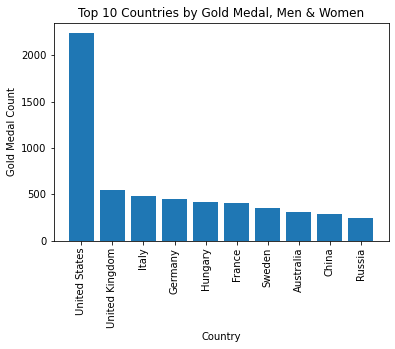

<Figure size 432x288 with 0 Axes>

In [116]:
plt.bar(top.index, top['Gold'], width = 0.8)
plt.xticks(rotation=90)
plt.title('Top 10 Countries by Gold Medal, Men & Women')
plt.xlabel('Country')
plt.ylabel('Gold Medal Count')
plt.show()
plt.clf()

Decided to make some updates and a better graph :)

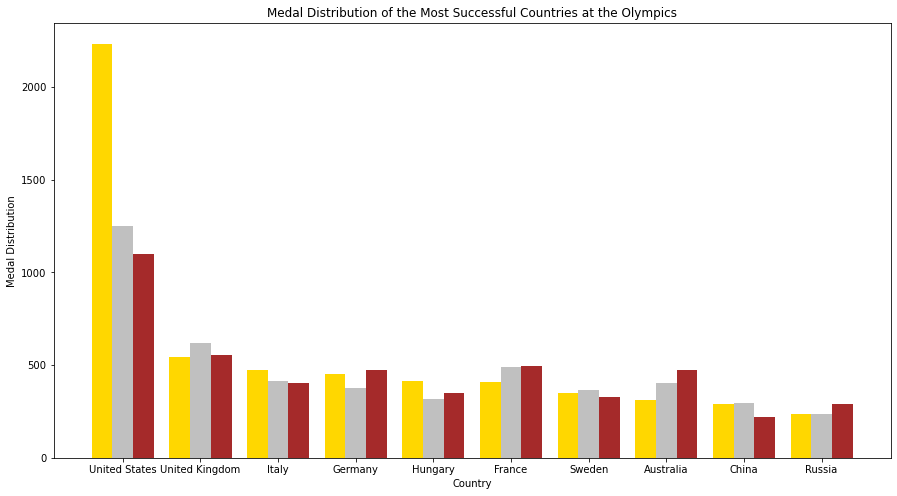

<Figure size 432x288 with 0 Axes>

In [117]:
countries = top.index.values
gold = top['Gold'].values
silver = top['Silver'].values
bronze = top ['Bronze'].values

n = 1  # This is our first dataset (out of 2)
t = 3 # Number of dataset
d = 10 # Number of sets of bars
w = 0.8 # Width of each bar

def create_x(t, w, n, d):
    return [t*x + w*n for x in range(d)]
gold2 = create_x(3, 0.8, 1, 10)
silver2= create_x(3, 0.8, 2, 10)
bronze2 = create_x(3, 0.8, 3, 10)

# Make your chart here

plt.figure(figsize=(15,8))
ax = plt.subplot()  

plt.bar(gold2, gold, color = 'Gold')
plt.bar(silver2, silver,color = 'Silver')
plt.bar(bronze2, bronze, color = 'Brown')

middle_x = [ (a + b + c) / 3.0 for a, b, c in zip(gold2, silver2, bronze2)]

ax.set_xticks(middle_x)
ax.set_xticklabels(countries)

plt.xlabel('Country')
plt.ylabel('Medal Distribution')
plt.title('Medal Distribution of the Most Successful Countries at the Olympics')

plt.show()
plt.clf()

Now, I want to see how the U.S. has performed over the time period given to us (1896 - 2014)

   Year   Medal  Gender
0  1896  Bronze       2
1  1896    Gold      11
2  1896  Silver       7
3  1900  Bronze      14
4  1900    Gold      27
Medal  Bronze  Gold  Silver
Year                       
1896        2    11       7
1900       14    27      14
1904      111   146     137
1908       15    34      14
1912       31    45      25


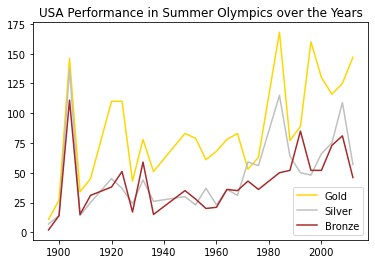

<Figure size 432x288 with 0 Axes>

In [118]:
usa = summer[summer['Country_y'] == 'United States']
usa = usa.groupby(['Year', 'Medal'])['Gender'].count().reset_index()
print(usa.head())

usapiv = usa.pivot('Year','Medal','Gender').fillna(0)
print(usapiv.head())

plt.plot(usapiv.index.values, usapiv['Gold'], color='Gold')
plt.plot(usapiv.index.values, usapiv['Silver'], color='Silver')
plt.plot(usapiv.index.values, usapiv['Bronze'], color='Brown')
plt.legend(["Gold", "Silver", 'Bronze'])
plt.title('USA Performance in Summer Olympics over the Years')
plt.show()
plt.clf()